In [3]:
#testing pushing 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
#Reading csv file 1
secom_labels_data='https://raw.githubusercontent.com/hugo-am/SECOM_HTWG2/refs/heads/Rebekah/secom_labels.data'
labels=pd.read_csv(secom_labels_data,header=None,sep=' ',names=['status','timestamp'])

In [6]:
#Generate an empty list to put column names in
column_list=[]

In [7]:
#Naming columns 0-590
for x in range(591):
    column_list.append(f'col{x}')

In [8]:
#Remove the first column name as it starts with 0
column_list.remove('col0')

In [9]:
#Reading csv file 2
secom_data='https://raw.githubusercontent.com/hugo-am/SECOM_HTWG2/refs/heads/Rebekah/secom.data'
data=pd.read_csv(secom_data,header=None,sep=' ',names=column_list)

In [68]:
#Data file has 590 columns and 1567 rows
print(data.shape)
data.head()

(1567, 590)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586,col58

In [69]:
#Generate base dataframe
df=data.merge(labels,left_index=True,right_index=True)
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586,col58

In [70]:
#Check for duplicate rows (there are 0)
df.duplicated().sum()

0

In [71]:
#Zero volatility columns are those with 0 or near 0 mean and std
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
col2,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
col3,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
col4,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
col5,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
col587,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
col588,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
col589,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
col590,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


In [72]:
#Missing values, Drop the 'status' and 'timestamp' columns
missing = df.drop(columns=['status', 'timestamp']).isna().sum().sort_values(ascending=False)

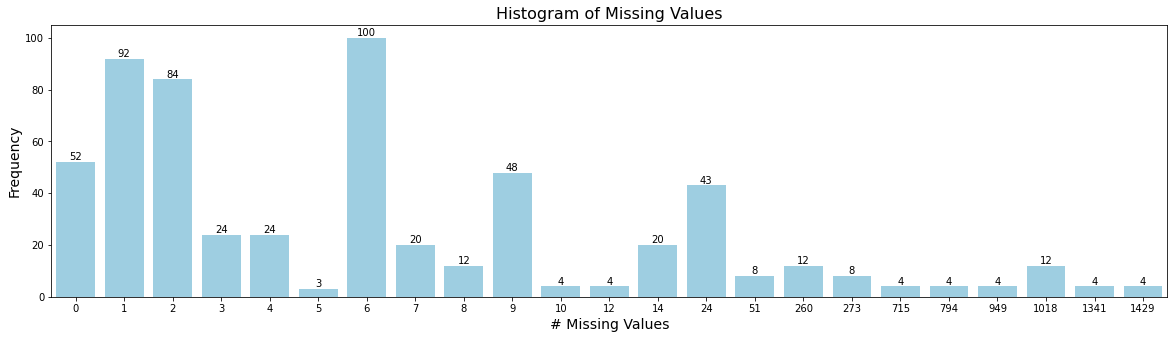

In [73]:
# Sort the missing value counts in descending order
missing_counts = missing.value_counts().sort_values(ascending=False)

# Plot the sorted histogram with axis labels
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, alpha=0.9, color='skyblue')  # Set bar color to blue
plt.xlabel("# Missing Values", fontsize=14)  # Label for x-axis
plt.ylabel("Frequency", fontsize=14)        # Label for y-axis
plt.title("Histogram of Missing Values", fontsize=16)  # Title for the plot

# Add label markers above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.show()

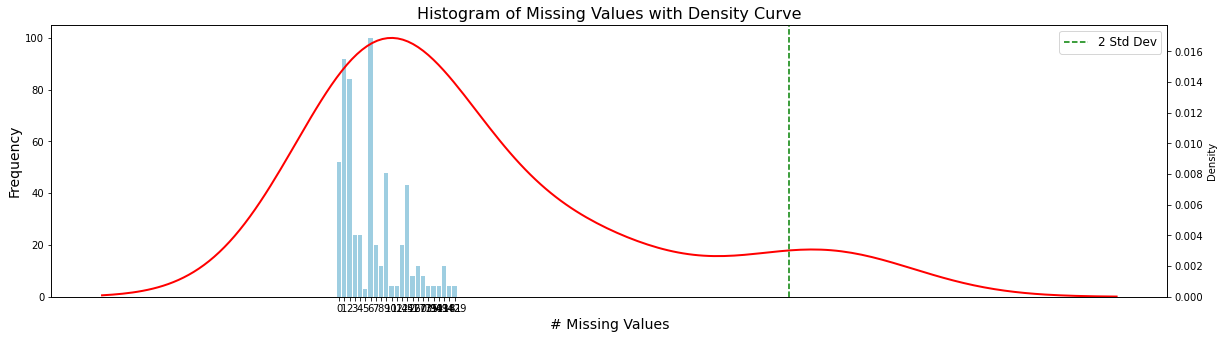

In [74]:
# Plot the histogram of missing values
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, alpha=0.9, color='skyblue')  # Set bar color to blue
plt.xlabel("# Missing Values", fontsize=14)  # Label for x-axis
plt.ylabel("Frequency", fontsize=14)        # Label for y-axis
plt.title("Histogram of Missing Values with Density Curve", fontsize=16)  # Title for the plot

# Plot the density curve
sns.kdeplot(missing_counts.values, color='red', linewidth=2, ax=ax.twinx())  # Use a secondary y-axis for the density curve

# Calculate the 2 standard deviation line
std_dev = missing_counts.std()
mean_value = missing_counts.mean()
two_std_line = mean_value + 2 * std_dev

# Add a vertical line at the 2 standard deviation mark
plt.axvline(x=two_std_line, color='green', linestyle='--', linewidth=1.5, label='2 Std Dev')

# Add legend
plt.legend(loc='upper right', fontsize=12)

plt.show()

In [75]:
# Calculate +3 and -3 standard deviations of missing VALUES
plus_3_std = mean_value + 3 * std_dev
minus_3_std = mean_value - 3 * std_dev

print(f"+3 Standard Deviations: {plus_3_std}")
print(f"-3 Standard Deviations: {minus_3_std}")

+3 Standard Deviations: 115.82296048490468
-3 Standard Deviations: -64.51861265881774


In [76]:
# Step 1: Calculate missing counts and missing percentages
missing_counts = data.isna().sum()


# Step 2: Basic counts
num_features_total = data.shape[1]
num_features_no_missing = (missing_counts == 0).sum()
num_features_25 = ((missing_counts > 0) & (missing_percentage < 25)).sum()
num_features_50 = ((missing_percentage >= 25) & (missing_percentage < 50)).sum()
num_features_half_missing = (missing_percentage >= 50).sum()


print(f"Total features: {num_features_total}")
print(f"Features with NO missing values: {num_features_no_missing} ( {num_features_no_missing/num_features_total*100:.2f}% )")
print(f"Features with missing values between 0-25%: {num_features_25} ( {num_features_25/num_features_total*100:.2f}% )")
print(f"Features with missing values between 25-50%: {num_features_50} ( {num_features_50/num_features_total*100:.2f}% )")
print(f"Features with >=50% missing values: {num_features_half_missing} ( {num_features_half_missing/num_features_total*100:.2f}% )")

# Step 3: Summary statistics
print("\nSummary of Missing Percentage:")
print(f"Minimum missing %: {missing_percentage.min():.2f}%")
print(f"Maximum missing %: {missing_percentage.max():.2f}%")
print(f"Mean missing %: {missing_percentage.mean():.2f}%")
print(f"Median missing %: {missing_percentage.median():.2f}%")

# Step 4: Top 10 features with most missingness
top_missing_features = missing_percentage.sort_values(ascending=False).head(10)
print("\nTop 10 features with highest missingness:")
print(top_missing_features)

Total features: 590
Features with NO missing values: 52 ( 8.81% )
Features with missing values between 0-25%: 506 ( 85.76% )
Features with missing values between 25-50%: 4 ( 0.68% )
Features with >=50% missing values: 28 ( 4.75% )

Summary of Missing Percentage:
Minimum missing %: 0.00%
Maximum missing %: 91.19%
Mean missing %: 4.54%
Median missing %: 0.38%

Top 10 features with highest missingness:
col158    91.193363
col293    91.193363
col294    91.193363
col159    91.193363
col493    85.577537
col359    85.577537
col86     85.577537
col221    85.577537
col247    64.964901
col110    64.964901
dtype: float64


In [77]:
#calculate 3s and 4s of missing PERCENT 
mean_missing_percentage = missing_percentage.mean()
std_missing_percentage = missing_percentage.std()

plus_3_std_missing_percentage = mean_missing_percentage + 3 * std_missing_percentage
minus_3_std_missing_percentage = mean_missing_percentage - 3 * std_missing_percentage

print(f"+3 Standard Deviations: {plus_3_std_missing_percentage}")
print(f"-3 Standard Deviations: {minus_3_std_missing_percentage}")

+3 Standard Deviations: 50.83950756140218
-3 Standard Deviations: -41.76440994423458


In [78]:
mean_missing_percentage = missing_percentage.mean()
std_missing_percentage = missing_percentage.std()

plus_4_std_missing_percentage = mean_missing_percentage + 4 * std_missing_percentage
minus_4_std_missing_percentage = mean_missing_percentage - 4 * std_missing_percentage

print(f"+4 Standard Deviations: {plus_4_std_missing_percentage}")
print(f"-4 Standard Deviations: {minus_4_std_missing_percentage}")

+4 Standard Deviations: 66.27349381234164
-4 Standard Deviations: -57.19839619517404


In [79]:
data.isna().sum()

col1       6
col2       7
col3      14
col4      14
col5      14
          ..
col586     1
col587     1
col588     1
col589     1
col590     1
Length: 590, dtype: int64

In [80]:
total_missing_values = data.isna().sum().sum()
print(f"Total missing values in the 'data' dataset: {total_missing_values}")

Total missing values in the 'data' dataset: 41951


In [81]:
# Calculate the total percentage of missing values
total_missing_percentage = (total_missing_values / (data.shape[0] * data.shape[1])) * 100
print(f"Total percentage of missing values in the 'data' dataset: {total_missing_percentage:.2f}%")

Total percentage of missing values in the 'data' dataset: 4.54%


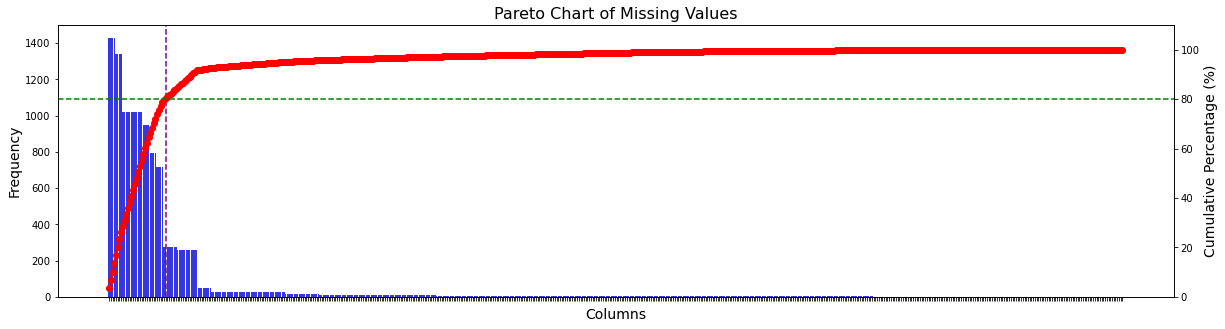

In [82]:
# Calculate missing value counts and sort them in descending order
missing_counts = df.isna().sum().sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percentage = missing_counts.cumsum() / missing_counts.sum() * 100

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot the bar chart for missing value counts
sns.barplot(x=missing_counts.index, y=missing_counts.values, alpha=0.9, ax=ax1, color='blue')
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_xlabel('Columns', fontsize=14)
ax1.set_title('Pareto Chart of Missing Values', fontsize=16)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(missing_counts.index, cumulative_percentage, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
ax2.set_ylim(0, 110)  # Ensure the percentage scale goes slightly above 100 for clarity

# Rotate x-axis labels for better readability
ax1.set_xticklabels([])

# Add horizontal line at 80% cumulative percentage
ax2.axhline(y=80, color='green', linestyle='--', linewidth=1.5)

# Find the column where the cumulative percentage exceeds 80%
threshold_index = cumulative_percentage[cumulative_percentage > 80].index[0]

# Add vertical line at the threshold column
ax1.axvline(x=threshold_index, color='purple', linestyle='--', linewidth=1.5)

plt.show()

In [83]:
# Combine missing counts and cumulative percentage into a DataFrame for better readability
missing_pct=missing_counts.values / df.shape[0] * 100
pareto_data = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing %': missing_pct,
    'Cumulative Percentage': cumulative_percentage.values
})

# Remove any limit on number of displayed rows and columns
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

# Now display the full DataFrame
pareto_data

,Column,Missing %,Cumulative Percentage
0,col158,91.193363,3.406355
1,col293,91.193363,6.812710
2,col294,91.193363,10.219065
3,col159,91.193363,13.625420
4,col493,85.577537,16.822007
...,...,...,...
587,col121,0.000000,100.000000
588,col157,0.000000,100.000000
589,col496,0.000000,100.000000
590,col495,0.000000,100.000000


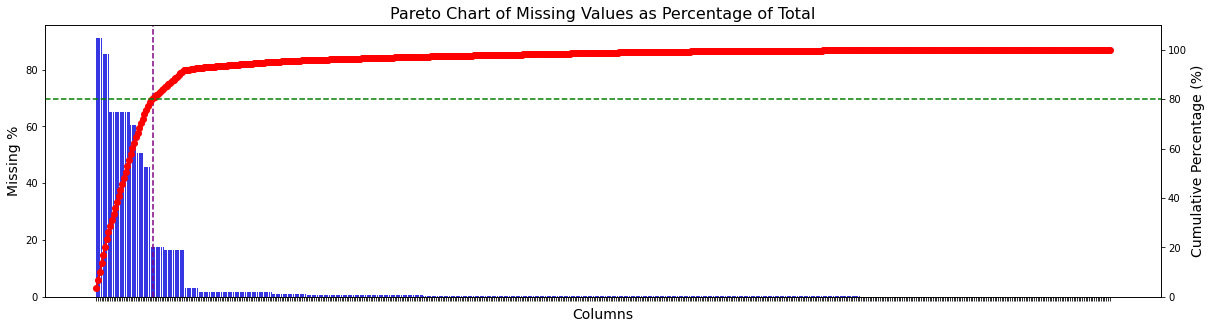

In [84]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot the bar chart for missing percentages
sns.barplot(x=pareto_data['Column'], y=pareto_data['Missing %'], alpha=0.9, ax=ax1, color='blue')
ax1.set_ylabel('Missing %', fontsize=14)
ax1.set_xlabel('Columns', fontsize=14)
ax1.set_title('Pareto Chart of Missing Values as Percentage of Total', fontsize=16)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(pareto_data['Column'], pareto_data['Cumulative Percentage'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
ax2.set_ylim(0, 110)  # Ensure the percentage scale goes slightly above 100 for clarity

# Rotate x-axis labels for better readability
ax1.set_xticklabels([])

# Add horizontal line at 80% cumulative percentage
ax2.axhline(y=80, color='green', linestyle='--', linewidth=1.5)

# Find the column where the cumulative percentage exceeds 80%
threshold_column = pareto_data.loc[pareto_data['Cumulative Percentage'] > 80, 'Column'].iloc[0]

# Add vertical line at the threshold column
threshold_index = pareto_data[pareto_data['Column'] == threshold_column].index[0]
ax1.axvline(x=threshold_index, color='purple', linestyle='--', linewidth=1.5)

plt.show()

In [85]:
# Sort the DataFrame by 'Cumulative Percentage' in descending order
sorted_pareto_data = pareto_data.sort_values(by='Cumulative Percentage', ascending=False)

# Print the 'Missing %' and 'Cumulative Percentage' columns
print(sorted_pareto_data[['Missing %', 'Cumulative Percentage']])

     Missing %  Cumulative Percentage
591   0.000000             100.000000
564   0.000000             100.000000
562   0.000000             100.000000
561   0.000000             100.000000
560   0.000000             100.000000
..         ...                    ...
4    85.577537              16.822007
3    91.193363              13.625420
2    91.193363              10.219065
1    91.193363               6.812710
0    91.193363               3.406355

[592 rows x 2 columns]


In [86]:
# Identify columns with zero variance
zero_variance_columns = data.columns[data.std() == 0]

# Drop zero variance columns
data = data.drop(columns=zero_variance_columns)

print(f"Removed {len(zero_variance_columns)} columns with zero variance.")
print(f"Remaining columns: {data.shape[1]}")

Removed 116 columns with zero variance.
Remaining columns: 474


In [88]:
# Identify columns with more than 65% missing values (change threshold per Tilo's comments from 60% to 65%)
missing_percentage = (missing_counts / data.shape[0]) * 100  # 1567 rows
columns_to_drop = missing_percentage[missing_percentage > 65].index

# Drop these columns from the dataset
data = data.drop(columns=columns_to_drop)

print(f"Removed {len(columns_to_drop)} columns with more than 65% missing values.")
print(f"Remaining columns: {data.shape[1]}")

Removed 8 columns with more than 65% missing values.
Remaining columns: 466


In [89]:
# Ensure the 'status' column is included in the split for stratification
data['status'] = labels['status']

# Perform the stratified split
train_data, test_data = train_test_split(
    data,
    test_size=0.2,
    stratify=data['status'],
    random_state=42
)

# Display the shapes of the resulting datasets
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (1253, 467)
Test data shape: (314, 467)



📊 Label Distribution (Counts):
    Full Data  Train Data  Test Data
-1       1463        1170        293
 1        104          83         21


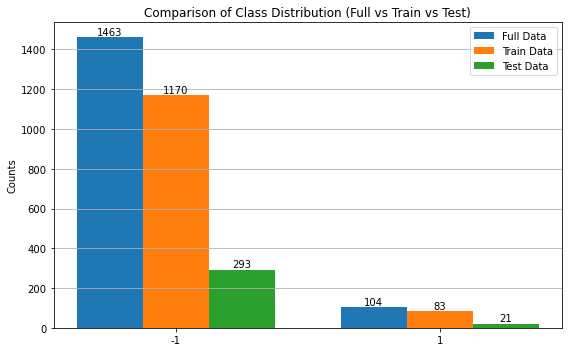

In [90]:
#summarize the distributions
full_counts = data['status'].value_counts().sort_index()
train_counts = train_data['status'].value_counts().sort_index()
test_counts = test_data['status'].value_counts().sort_index()

# Combine into a single table
distribution_table = pd.DataFrame({
    'Full Data': full_counts,
    'Train Data': train_counts,
    'Test Data': test_counts
})

print("\n📊 Label Distribution (Counts):")
print(distribution_table)

labels_list = distribution_table.index.tolist()
x = np.arange(len(labels_list))  # the label locations

width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width, distribution_table['Full Data'], width, label='Full Data')
rects2 = ax.bar(x, distribution_table['Train Data'], width, label='Train Data')
rects3 = ax.bar(x + width, distribution_table['Test Data'], width, label='Test Data')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Comparison of Class Distribution (Full vs Train vs Test)')
ax.set_xticks(x)
ax.set_xticklabels(labels_list)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)
    
plt.show()


In [91]:
data.shape, train_data.shape, test_data.shape

((1567, 467), (1253, 467), (314, 467))

In [92]:
total_missing_values

41951

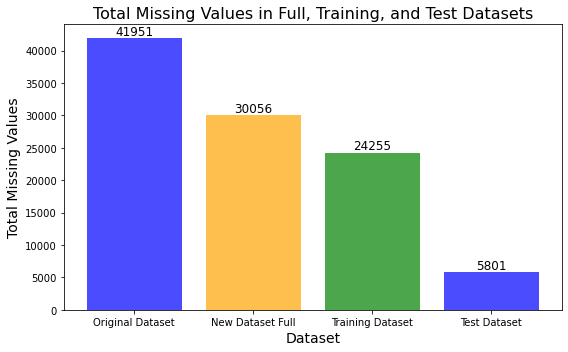

In [93]:
# Calculate the total number of missing values for each dataset
total_missing_full = data.isna().sum().sum()
total_missing_train = train_data.isna().sum().sum()
total_missing_test = test_data.isna().sum().sum()

# Create a bar plot
plt.figure(figsize=(8, 5))
datasets = ['Original Dataset', 'New Dataset Full', 'Training Dataset', 'Test Dataset']
missing_values = [total_missing_values, total_missing_full, total_missing_train, total_missing_test]

plt.bar(datasets, missing_values, color=['blue', 'orange', 'green'], alpha=0.7)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Total Missing Values', fontsize=14)
plt.title('Total Missing Values in Full, Training, and Test Datasets', fontsize=16)

# Add value labels above the bars
for i, value in enumerate(missing_values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Train/Test Split Demarcation

In [100]:
#Scale the data using standard scaler (z-score normalization); centers each feature to mean 0 and scales to unit variance. 
scaler = StandardScaler().fit(train_data)
x_train_scaled = scaler.transform(train_data)
# Convert the scaled data back to a DataFrame
x_train = pd.DataFrame(x_train_scaled, columns=train_data.columns, index=train_data.index)

x_train

,col1,col2,col3,col4,col5,col7,col8,col9,col10,col11,col12,col13,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col44,col45,col46,col47,col48,col49,col51,col52,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col143,col144,col145,col146,col147,col148,col149,col151,col152,col153,col154,col155,col156,col157,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col181,col182,col183,col184,col185,col186,col188,col189,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col222,col223,col224,col225,col226,col228,col229,col239,col240,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col268,col269,col270,col271,col272,col273,col274,col275,col276,col278,col279,col280,col281,col282,col283,col284,col286,col287,col288,col289,col290,col291,col292,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col317,col318,col319,col320,col321,col322,col324,col325,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col360,col361,col362,col363,col364,col366,col367,col368,col369,col377,col378,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col406,col407,col408,col409,col410,col411,col412,col413,col414,col416,col417,col418,col419,col420,col421,col422,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col453,col454,col455,col456,col457,col458,col460,col461,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col494,col495,col496,col497,col498,col500,col501,col511,col512,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586,col587,col588,col589,col590,status
1198,0.837162,-0.069206,-0.511365,-0.432685,-0.052540,0.740973,-0.147896,-0.870329,-0.924795,-0.078624,0.731488,0.883208,-2.097572,-0.945441,0.122172,0.845366,0.953102,0.504360,-0.136493,-0.027517,-0.102293,-1.408048,0.072243,0.365955,0.400671,0.569886,2.297668,-0.398252,-0.710271,-0.386826,-0.495895,-0.485151,-0.151520,-0.018767,0.151512,-0.475040,-0.243929,-0.421528,0.604559,-0.077205,0.976219,0.578825,-0.117368,0.595262,0.607637,0.726305,0.976557,0.522979,-0.627369,-1.019290,1.428305,-1.338240,1.075749,-0.861589,-0.507202,1.037667,0.878804,-0.295068,0.518603,0.274831,-0.006728,0.610207,-0.056844,0.016663,0.374191,-0.224256,0.320348,-0.098511,-0.028307,0.011606,-0.922833,-0.902685,1.671274,-1.076540,-0.169545,0.642202,1.279812,0.530598,0.162189,0.515474,0.468528,-0.596811,-0.293098,-0.832877,-0.649899,0.805918,-0.13

In [ ]:
#mean imputation
mean_imputed_w_outliers=x_train.fillna(x_train.mean())

#KNN Imputation using sklearn's KNNImputer
knn_imputer_w_outliers = KNNImputer(n_neighbors=5)
knn_imputed_w_outliers = pd.DataFrame(knn_imputer_w_outliers.fit_transform(x_train), columns=x_train.columns)

# MICE Imputation (Iterative Imputer from sklearn)
#mice_imputer_w_outliers = IterativeImputer(max_iter=50, random_state=500)
#mice_imputed_w_outliers = pd.DataFrame(mice_imputer_w_outliers.fit_transform(train_data), columns=train_data.columns)

#calculate variance for each imputed dataset. this is the mean but Tilo demonstrated it for each column. 
var_original_w_outliers = x_train.var().mean()
var_mean_w_outliers = mean_imputed_w_outliers.var().mean()
var_knn_w_outliers = knn_imputed_w_outliers.var().mean()
#var_mice_w_outliers = mice_imputed_w_outliers.var().mean()


# Print SSD results
print("\nVariances:")
print(f"Original Data: {var_original_w_outliers}")
print(f"Mean Imputation: {var_mean_w_outliers}")    
print(f"KNN Imputation: {var_knn_w_outliers}")
#print(f"MICE Imputation: {var_mice_w_outliers}")


Variances:
Original Data: 1.0008724701814664
Mean Imputation: 0.9593147751606007
KNN Imputation: 0.9666705987547035


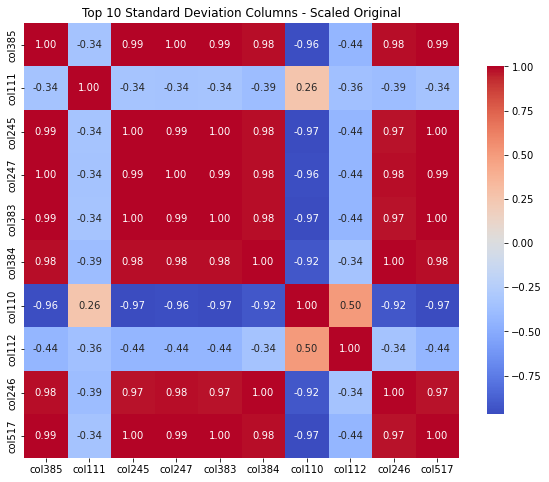

In [126]:
#calculate standard deviation for each imputed dataset
std_original_w_outliers = x_train.std().mean()


#show a correlation heatmap of highest 10 standard deviation columns, correlated with each other
# Select the top 10 columns with the highest standard deviation
top_10_std_columns = x_train.std().nlargest(10).index
top_10_std_data = x_train[top_10_std_columns]
# Calculate the correlation matrix
correlation_matrix = top_10_std_data.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Top 10 Standard Deviation Columns - Scaled Original")
plt.show()


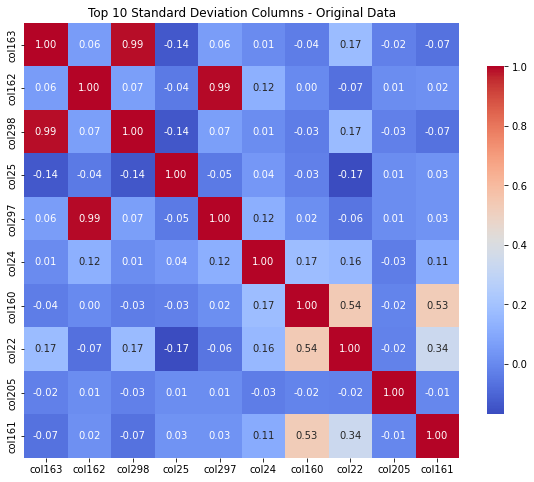

In [127]:
#calculate standard deviation for each imputed dataset
std_train_data = train_data.std().mean()


#show a correlation heatmap of highest 10 standard deviation columns, correlated with each other
# Select the top 10 columns with the highest standard deviation
top_10_std_columns_train_data = train_data.std().nlargest(10).index
top_10_std_data_train_data = train_data[top_10_std_columns_train_data]
# Calculate the correlation matrix
correlation_matrix_train_data = top_10_std_data_train_data.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train_data, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Top 10 Standard Deviation Columns - Original Data")
plt.show()
